# KNN Project Exercise 

Due to the simplicity of KNN for Classification, let's focus on using a PipeLine and a GridSearchCV tool, since these skills can be generalized for any model.


## The Sonar Data 

### Detecting a Rock or a Mine

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.

<img src="sonar.jpg"  style="max-height: 500px; max-width: 500px;">

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine). 

<img src="mine.jpg"  style="max-height: 500px; max-width: 500px;">

Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.


Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

### Complete the Tasks in bold

**TASK: Run the cells below to load the data.**

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
!pip install Jinja2

You should consider upgrading via the 'C:\ProgramData\Anaconda3\envs\py10\python.exe -m pip install --upgrade pip' command.


In [101]:
df = pd.read_csv('sonar.all-data',sep = ',', header=None)
headers = [f'Freq_{i+1}' for i in range(len(df.columns)-1)]
headers.append('Label')
df.columns = headers

In [102]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Data Exploration

**TASK: Create a heatmap of the correlation between the difference frequency responses.**

In [103]:
# CODE HERE
corr = df.corr()

corr.style.background_gradient(cmap="Spectral")

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,Freq_11,Freq_12,Freq_13,Freq_14,Freq_15,Freq_16,Freq_17,Freq_18,Freq_19,Freq_20,Freq_21,Freq_22,Freq_23,Freq_24,Freq_25,Freq_26,Freq_27,Freq_28,Freq_29,Freq_30,Freq_31,Freq_32,Freq_33,Freq_34,Freq_35,Freq_36,Freq_37,Freq_38,Freq_39,Freq_40,Freq_41,Freq_42,Freq_43,Freq_44,Freq_45,Freq_46,Freq_47,Freq_48,Freq_49,Freq_50,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
Freq_1,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,0.344058,0.210861,0.210722,0.256278,0.304878,0.239079,0.137845,0.041817,0.055227,0.156760,0.117663,-0.056973,-0.163426,-0.218093,-0.295683,-0.342865,-0.341703,-0.224340,-0.199099,-0.077430,-0.048370,-0.030444,-0.031939,0.031319,0.098118,0.080722,0.119565,0.209873,0.208371,0.099993,0.127313,0.213592,0.206057,0.157949,0.279968,0.319354,0.230343,0.203234,0.247560,0.269287,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
Freq_2,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,0.297065,0.194102,0.249596,0.273170,0.307599,0.261844,0.152170,0.042870,0.040911,0.102428,0.075255,-0.074157,-0.179365,-0.196469,-0.295302,-0.365749,-0.337046,-0.234386,-0.228490,-0.115301,-0.055862,-0.049683,-0.108272,-0.004247,0.115824,0.132611,0.169186,0.217494,0.186828,0.098350,0.188226,0.261345,0.186368,0.133018,0.285716,0.304247,0.255797,0.265279,0.313995,0.245868,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
Freq_3,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,0.274610,0.214807,0.258767,0.291724,0.285663,0.237017,0.201093,0.120587,0.099303,0.103117,0.063990,-0.026815,-0.073400,-0.085380,-0.214256,-0.291974,-0.263111,-0.256674,-0.290728,-0.197493,-0.106198,-0.109895,-0.170671,-0.099409,0.017053,0.053070,0.107530,0.130276,0.110499,0.074137,0.189047,0.233442,0.113920,0.071946,0.180734,0.173649,0.179528,0.234896,0.223074,0.081096,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
Freq_4,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,0.271881,0.175381,0.215754,0.286708,0.278529,0.248245,0.223203,0.194992,0.189405,0.188317,0.142271,0.036010,-0.029749,-0.102975,-0.206673,-0.291357,-0.294749,-0.256074,-0.300476,-0.236602,-0.190086,-0.169987,-0.164651,-0.083965,0.015200,0.039282,0.063486,0.089887,0.089346,0.045141,0.145241,0.144693,0.050629,-0.008407,0.087824,0.080012,0.046109,0.121065,0.133294,0.077925,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
Freq_5,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,0.231684,0.211657,0.299086,0.359062,0.318059,0.328725,0.326477,0.299266,0.340543,0.285737,0.205088,0.152897,0.073934,-0.000624,-0.067296,-0.125675,-0.169618,-0.214692,-0.283863,-0.273350,-0.214336,-0.173485,-0.200586,-0.140559,-0.086529,-0.073481,-0.064617,-0.008620,0.063408,0.061616,0.098832,0.125181,0.063706,0.031575,0.089202,0.081964,0.041419,0.084435,0.088128,0.066751,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
Freq_6,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,0.333570,0.344451,0.411107,0.396233,0.367908,0.353783,0.293190,0.235778,0.226305,0.206841,0.174768,0.123770,0.064081,0.027026,-0.043280,-0.100309,-0.129094,-0.118645,-0.156081,-0.151186,-0.054136,-0.051934,-0.144391,-0.070337,-0.028815,-0.023621,-0.064798,-0.048745,0.030599,0.081119,0.075797,0.048763,0.034380,0.048870,0.085468,0.029524,0.016640,0.067196,0.080729,0.017300,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
Freq_7,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,0.396588,0.274432,0.365391,0.409576,0.411692,0.363086,0.250024,0.2080

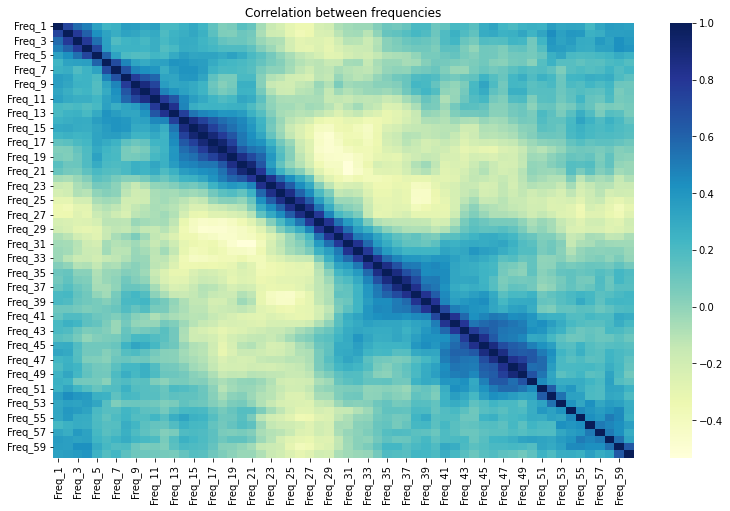

In [104]:
plt.figure(figsize=(13,8))
dataplot=sns.heatmap(df.corr(), cmap='YlGnBu')
plt.title('Correlation between frequencies')
# displaying heatmap
plt.show()


**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [105]:
#CODE HERE
En = LabelEncoder()
df['Label'] = En.fit_transform(df['Label'])
df.corr().iloc[:,-1].abs().sort_values()[-6:]

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Label      1.000000
Name: Label, dtype: float64

<AxesSubplot:>

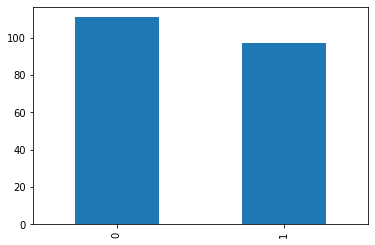

In [106]:
df['Label'].value_counts().plot(kind='bar')

### Data quality check

In [107]:
if df.isna().values.any():
    print("This dataset contains null values")
else:
    print("This dataset doesn't contain any null values.")
    
if df.duplicated().any():
    print(f"This dataset containes {df.duplicated().sum} consistant duplicated values.")
else:
    print("This dataset doesn't contain any consistant duplicated values.")

This dataset doesn't contain any null values.
This dataset doesn't contain any consistant duplicated values.


## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: The solution uses a random_state=42*

In [108]:
# CODE HERE
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1],test_size=0.1, stratify=df.iloc[:,-1], shuffle= True, random_state=42)

**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [109]:
# CODE HERE
full_pipline = Pipeline(
    steps=[('scaler', StandardScaler()),
           ('my_classifier', 
           KNeighborsClassifier(),
        )]
)
full_pipline

Pipeline(steps=[('scaler', StandardScaler()),
                ('my_classifier', KNeighborsClassifier())])

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [110]:
# CODE HERE
param_grid = {
    'my_classifier__n_neighbors': np.arange(1,32,2),   
}

# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
grid_search = GridSearchCV(
    full_pipline, param_grid, cv=5, verbose=1, n_jobs=-1, 
    scoring='accuracy')

grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best parameter {}'.format(grid_search.best_params_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
best score 0.8398293029871977
best parameter {'my_classifier__n_neighbors': 1}


In [111]:
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('my_classifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'my_classifier__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31])},
             scoring='accuracy', verbose=1)

In [112]:
full_pipline.get_params(deep=True)

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('my_classifier', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'my_classifier': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'my_classifier__algorithm': 'auto',
 'my_classifier__leaf_size': 30,
 'my_classifier__metric': 'minkowski',
 'my_classifier__metric_params': None,
 'my_classifier__n_jobs': None,
 'my_classifier__n_neighbors': 5,
 'my_classifier__p': 2,
 'my_classifier__weights': 'uniform'}

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

In [113]:
#CODE HERE
length = len(list(pd.DataFrame(grid_search.cv_results_)['mean_test_score']))
list(pd.DataFrame(grid_search.cv_results_)['mean_test_score'])

[0.8398293029871977,
 0.839402560455192,
 0.8125177809388336,
 0.8230440967283073,
 0.769701280227596,
 0.7428165007112376,
 0.7371266002844951,
 0.7428165007112375,
 0.7266002844950213,
 0.72674253200569,
 0.748221906116643,
 0.7376955903271691,
 0.7321479374110954,
 0.7376955903271694,
 0.7320056899004268,
 0.7213371266002846]

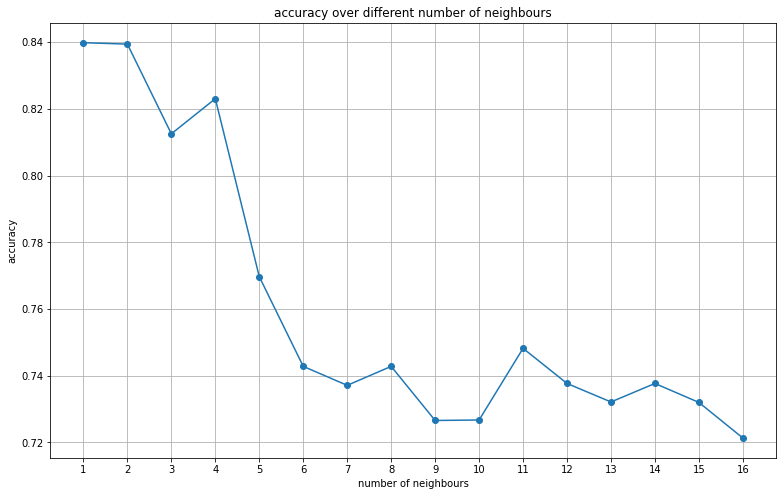

In [114]:
plt.figure(figsize=(13,8))
plt.plot(np.arange(1,length+1),list(pd.DataFrame(grid_search.cv_results_)['mean_test_score']), marker = 'o')
plt.xlabel("number of neighbours")
plt.ylabel("accuracy")
plt.title('accuracy over different number of neighbours')
plt.xticks(np.arange(1,length+1,1))
plt.grid(True)

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [115]:
#Code Here
prediction = grid_search.predict(X_test)
print(classification_report(y_test,prediction))


              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.88      0.70      0.78        10

    accuracy                           0.81        21
   macro avg       0.82      0.80      0.81        21
weighted avg       0.82      0.81      0.81        21



In [116]:
confusion_matrix(y_test, prediction)

array([[10,  1],
       [ 3,  7]], dtype=int64)

### Great Job!